# Lead Scoring Case study 

## Problem statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Step 1: Reading and Understanding the data

In [1]:
## Importing the necessary libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
# suppressing the necessary warnings 
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns',50)

In [4]:
# loading the data frame 
lead_df = pd.read_csv("Leads.csv")

In [5]:
# checcking the head of the dataset
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# checking the tail portion of the dataset 
lead_df.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


### Inspecting the various aspects of the lead score dataset 

In [7]:
# shape of the data set 
lead_df.shape

(9240, 37)

- Initially dataset has 9240 rows and 37 columns

In [8]:
# checking the columns present in the data set 
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [9]:
# checking the statistical summary of the data set 
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
# checking the overall information about the data set 
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Seems there are quite many categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, which needs to be treated accordingly

## Step 2: Data cleaning and Preparation 

In [11]:
## Checking the Number of missing values in each column
lead_df.isna().sum().sort_values(ascending = False)

Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Do Not Call                 

- As we can infer that there are lot of columns which are having higher number of null values . Assuming that these much high null valued columns will not be a better features in building the model. 

- In total there are more than 9000 data points . First we are eliminating the columns that are having missing values more than 3000(i.e: > 33%)

In [12]:
# Dropping all the columns having missing values more than 3000
for column in lead_df.columns:
    if lead_df[column].isna().sum() >=3000:
        lead_df.drop(column , axis =1 , inplace=True)


In [13]:
#checking the number of null values again 
lead_df.isna().sum().sort_values(ascending = False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Number                                         0
Lead Origin                                         0
Do Not Email                                        0
Converted                                           0
Total Time Spent on Website                         0
Do Not Call                                         0
Last Notable Activity                               0
A free copy of Mastering The

In [14]:
lead_df.shape

(9240, 31)

- 6 columns are getting dropped

Assuming that 'City', 'Country' columns will not add much insights in our analysis.Dropping those columns

In [15]:
lead_df.drop(columns = ['City','Country'] , axis = 1 , inplace = True)

In [16]:
lead_df.shape

(9240, 29)

In [17]:
# checking the number of null values again
lead_df.isna().sum().sort_values(ascending = False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Number                                         0
Lead Origin                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
Total Time Spent on Website                         0
Last Notable Activity                               0
A free copy of Mastering The Interview              0
Search                                              0
Magazine                    

In [18]:
## checking the percentage of null values in each column 
round(100*(lead_df.isna().sum() / len(lead_df.index)),2).sort_values(ascending = False)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
How did you hear about X Education               23.89
Specialization                                   15.56
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search                                            0.00
Magazine  

- Seems few columns having missing values more than 15%

**There are few columns in which there is a level called 'Select' which means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are also considered to be missing values and hence identifying the value counts of the level 'Select' in all the columns that it is present.**

In [19]:
for column in lead_df.columns:
    print(lead_df[column].astype('category').value_counts())
    print('='*40)

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference         

- There are 3 columns that are having 'select' level in it . Checking each of them again in detail 

In [20]:
# value counts on Lead Profile
lead_df['Lead Profile'].value_counts()


Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [21]:
# value counts on 'How did you hear about X Education'
lead_df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [22]:
# value counts on Specialization 
lead_df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

- From the above 3 columns , 'How did you hear about X Education','Lead Profile'  have lot of rows as 'Select' in it which might be of giving no insights while building the model/Misleading the model to a new perception

In [23]:
# dropping the columns  'How did you hear about X Education','Lead Profile'
lead_df.drop(columns = [ 'How did you hear about X Education','Lead Profile'] , axis = 1 , inplace= True)

In [24]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [25]:
lead_df.shape

(9240, 27)

 *There were few columns in which only one value was majorly present for all the data points. These include Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque. Almost all of the values for these variables are No, it's best that we drop these columns as they would not add value in building the model*

In [26]:
## dropping the above mentioned columns 
lead_df.drop(columns = ['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'] ,axis = 1 , inplace= True)

In [27]:
lead_df.shape

(9240, 15)

In [28]:
# checking the 'What matters most to you in choosing a course' column
lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

- It has only three levels where 'Better Career Prospects' is almost present in the all the records . So dropping this column as well

In [29]:
lead_df.drop('What matters most to you in choosing a course', axis = 1 , inplace = True)

In [30]:
lead_df.shape

(9240, 14)

In [31]:
lead_df.isna().sum().sort_values(ascending = False)

What is your current occupation           2690
Specialization                            1438
Page Views Per Visit                       137
TotalVisits                                137
Last Activity                              103
Lead Source                                 36
Last Notable Activity                        0
A free copy of Mastering The Interview       0
Total Time Spent on Website                  0
Converted                                    0
Do Not Email                                 0
Lead Origin                                  0
Lead Number                                  0
Prospect ID                                  0
dtype: int64

'What is your current occupation' -- This column is having more null values. Assuming that this column may be significant in further analysis.Instead of dropping the enitre column , we are dropping the rows having missing values in it 


In [32]:
# dropping null rows 
lead_df = lead_df[~lead_df['What is your current occupation'].isna()]

In [33]:
lead_df.shape

(6550, 14)

In [34]:
# checking the number of null values again
lead_df.isna().sum().sort_values(ascending = False)

Page Views Per Visit                      130
TotalVisits                               130
Last Activity                             103
Lead Source                                36
Specialization                             18
Last Notable Activity                       0
A free copy of Mastering The Interview      0
What is your current occupation             0
Total Time Spent on Website                 0
Converted                                   0
Do Not Email                                0
Lead Origin                                 0
Lead Number                                 0
Prospect ID                                 0
dtype: int64

- Seems the number of null values in the column are quite minimum . Hence its better to drop those missing records one by one

In [35]:
# dropping the 'TotalVisits' missing records
lead_df = lead_df[~lead_df['TotalVisits'].isna()]

In [36]:
# checking the null values again 
lead_df.isna().sum().sort_values(ascending = False)

Lead Source                               29
Specialization                            18
Last Notable Activity                      0
A free copy of Mastering The Interview     0
What is your current occupation            0
Last Activity                              0
Page Views Per Visit                       0
Total Time Spent on Website                0
TotalVisits                                0
Converted                                  0
Do Not Email                               0
Lead Origin                                0
Lead Number                                0
Prospect ID                                0
dtype: int64

In [37]:
# dropping the 'Lead Source' missing records
lead_df = lead_df[~lead_df['Lead Source'].isna()]

In [38]:
# checking the null values again 
lead_df.isna().sum().sort_values(ascending = False)

Specialization                            18
Last Notable Activity                      0
A free copy of Mastering The Interview     0
What is your current occupation            0
Last Activity                              0
Page Views Per Visit                       0
Total Time Spent on Website                0
TotalVisits                                0
Converted                                  0
Do Not Email                               0
Lead Source                                0
Lead Origin                                0
Lead Number                                0
Prospect ID                                0
dtype: int64

In [39]:
# dropping the 'Specialization' missing records 
lead_df = lead_df[~lead_df['Specialization'].isna()]

In [40]:
# checking the null values again 
lead_df.isna().sum().sort_values(ascending = False)

Last Notable Activity                     0
A free copy of Mastering The Interview    0
What is your current occupation           0
Specialization                            0
Last Activity                             0
Page Views Per Visit                      0
Total Time Spent on Website               0
TotalVisits                               0
Converted                                 0
Do Not Email                              0
Lead Source                               0
Lead Origin                               0
Lead Number                               0
Prospect ID                               0
dtype: int64

In [41]:
lead_df.shape

(6373, 14)

Now all the columns have no Null values

In [42]:
print(len(lead_df.index))
print(len(lead_df.index) / 9240)
print(round(100*(len(lead_df.index) / 9240),2))

6373
0.6897186147186147
68.97


Now 69% of the rows got retained which seems good enough

In [43]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


'Prospect ID' & 'Lead Number' -- These two columns are unique identifier for each records. Hence this won't add much insights to the analysis. 
Dropping those columns 

In [44]:
lead_df.drop(columns = ['Prospect ID','Lead Number'] , axis=1 , inplace = True)

In [45]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


## Step 3 : Dummy Variable Creation

The next step is identifying the categorical variables and Converting to dummies

In [46]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   obje

In [47]:
lead_df.shape

(6373, 12)

In [48]:
#obtaining the object category columns 
category_df = lead_df.loc[:,lead_df.dtypes == 'object']
category_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [49]:
# Creating dummy variables for those categorical columns 
category_dummy = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

In [50]:
category_dummy

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,...,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9235,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9236,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
9237,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [51]:
## adding the results to the actual dataframe
lead_df = pd.concat([lead_df,category_dummy] , axis=1)

In [52]:
## for 'Specialization' column , there is a category level called Select which might not add any insights to our analysis .
## Hence creating dummy and dropping that specific category 
category_dummy1 = pd.get_dummies(lead_df['Specialization'] , prefix = 'Specialization')
category_dummy1 = category_dummy1.drop(['Specialization_Select'],1)
lead_df = pd.concat([lead_df,category_dummy1] , axis=1)

In [53]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified,0,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
## dropping the actual columns for categorical variables 
lead_df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'] , axis=1 , inplace=True)

In [55]:
# looking at the data set again 
lead_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Step 4: Splitting the data into Training and Testing sets

In [56]:
## Splitting the data into Training and Testing Sets
from sklearn.model_selection import train_test_split

In [57]:
predictor_variables = lead_df.loc[: , lead_df.columns != 'Converted']
predictor_variables.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
target_variable = lead_df['Converted']
target_variable.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [59]:
predictor_variables.shape

(6373, 74)

In [60]:
target_variable.shape

(6373,)

In [61]:
# splitting the data into 70% train and 30% test set 
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(predictor_variables, target_variable, train_size = 0.7, test_size = 0.3, random_state = 100)


## Step5: Scaling the data

In [62]:
## importing Minmaxsacler
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler = MinMaxScaler()

In [64]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 75 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             6373 non-null   int64  
 1   TotalVisits                                           6373 non-null   float64
 2   Total Time Spent on Website                           6373 non-null   int64  
 3   Page Views Per Visit                                  6373 non-null   float64
 4   Lead Origin_Landing Page Submission                   6373 non-null   uint8  
 5   Lead Origin_Lead Add Form                             6373 non-null   uint8  
 6   Lead Origin_Lead Import                               6373 non-null   uint8  
 7   Lead Source_Direct Traffic                            6373 non-null   uint8  
 8   Lead Source_Facebook                                  6373

There are 3 columns ('TotalVisits','Page Views per visit','Total time spent on websites') that are Numeric variables . These variables needs to be scaled

In [65]:
numeric_columns = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns]) 

In [66]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Correlation Analysis

In [67]:
## Analysing the correlation matrix and heat map 
lead_df.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Converted,1.000000,0.005651,0.313338,-0.063362,-0.117563,0.288666,-0.019269,-0.133600,-0.021207,0.020205,0.018407,-0.044348,-0.034223,-0.012059,-0.012059,0.243200,-0.023501,0.000676,0.013015,0.144864,-0.006411,-0.012059,-0.148451,-0.138834,-0.134838,...,-0.239572,-0.039205,-0.032219,0.284301,0.050436,-0.026673,-0.012059,0.036229,0.014468,-0.017955,-0.015443,0.027078,0.028249,-0.006080,0.025865,-0.005689,-0.024789,0.049520,-0.000862,0.031349,-0.018603,0.006964,-0.005142,0.005785,-0.011762
TotalVisits,0.005651,1.000000,0.202551,0.489039,0.267954,-0.208375,-0.043000,0.075252,-0.042052,0.085306,-0.012720,-0.247963,0.192469,-0.001549,0.005896,-0.180458,0.078163,-0.003946,-0.004031,-0.097011,-0.004116,0.003414,0.028900,-0.074517,-0.040748,...,-0.088690,-0.004994,0.226728,-0.028923,0.002792,0.001631,0.010859,0.042269,0.035184,0.015248,0.019003,0.031922,0.027640,0.016549,0.032934,0.025182,0.028630,-0.000493,0.038725,0.008929,0.014223,0.068015,0.015114,0.063383,0.064384
Total Time Spent on Website,0.313338,0.202551,1.000000,0.303870,0.275606,-0.249493,-0.061429,0.114088,-0.060945,0.227496,-0.016774,-0.320143,0.078956,-0.009090,-0.003927,-0.214864,0.017643,0.000557,0.014377,-0.119563,-0.012549,-0.005124,-0.054778,-0.024604,-0.041186,...,-0.107230,-0.009837,0.035147,0.082950,0.010331,0.001504,-0.009888,0.027925,0.051841,0.003934,-0.004325,0.060133,0.021332,0.026204,0.038074,0.025526,0.011056,0.052437,0.043356,0.050860,0.024919,0.018767,0.003203,0.045386,0.037867
Page Views Per Visit,-0.063362,0.489039,0.303870,1.000000,0.458168,-0.340185,-0.065739,0.109785,-0.062896,0.183735,-0.020279,-0.423570,0.301139,0.003003,0.020345,-0.293623,0.085383,0.000160,-0.002777,-0.157186,-0.001473,0.000113,0.036723,-0.071321,-0.037576,...,-0.075318,-0.042338,0.017507,0.031327,0.015233,0.028551,0.001096,0.074643,0.034366,0.036748,0.039288,0.062656,0.031647,0.025231,0.049113,0.062421,0.057990,0.017799,0.063772,0.030364,0.026099,0.027465,0.015230,0.052972,0.111284
Lead Origin_Landing Page Submission,-0.117563,0.267954,0.275606,0.458168,1.000000,-0.363764,-0.074917,0.508857,-0.071507,0.067225,-0.020350,-0.463338,0.039810,0.010907,0.010907,-0.313921,-0.072452,-0.002462,0.010907,-0.165086,0.004288,0.010907,0.081123,0.048352,0.055177,...,-0.062914,-0.085315,0.050847,0.020810,-0.013579,0.024441,-0.014388,0.085071,0.112923,0.056279,0.066864,0.169848,0.040708,0.042446,0.123067,0.133206,0.089105,0.084975,0.093730,0.095849,0.070983,0.050077,0.039433,0.111610,0.094875
...,..

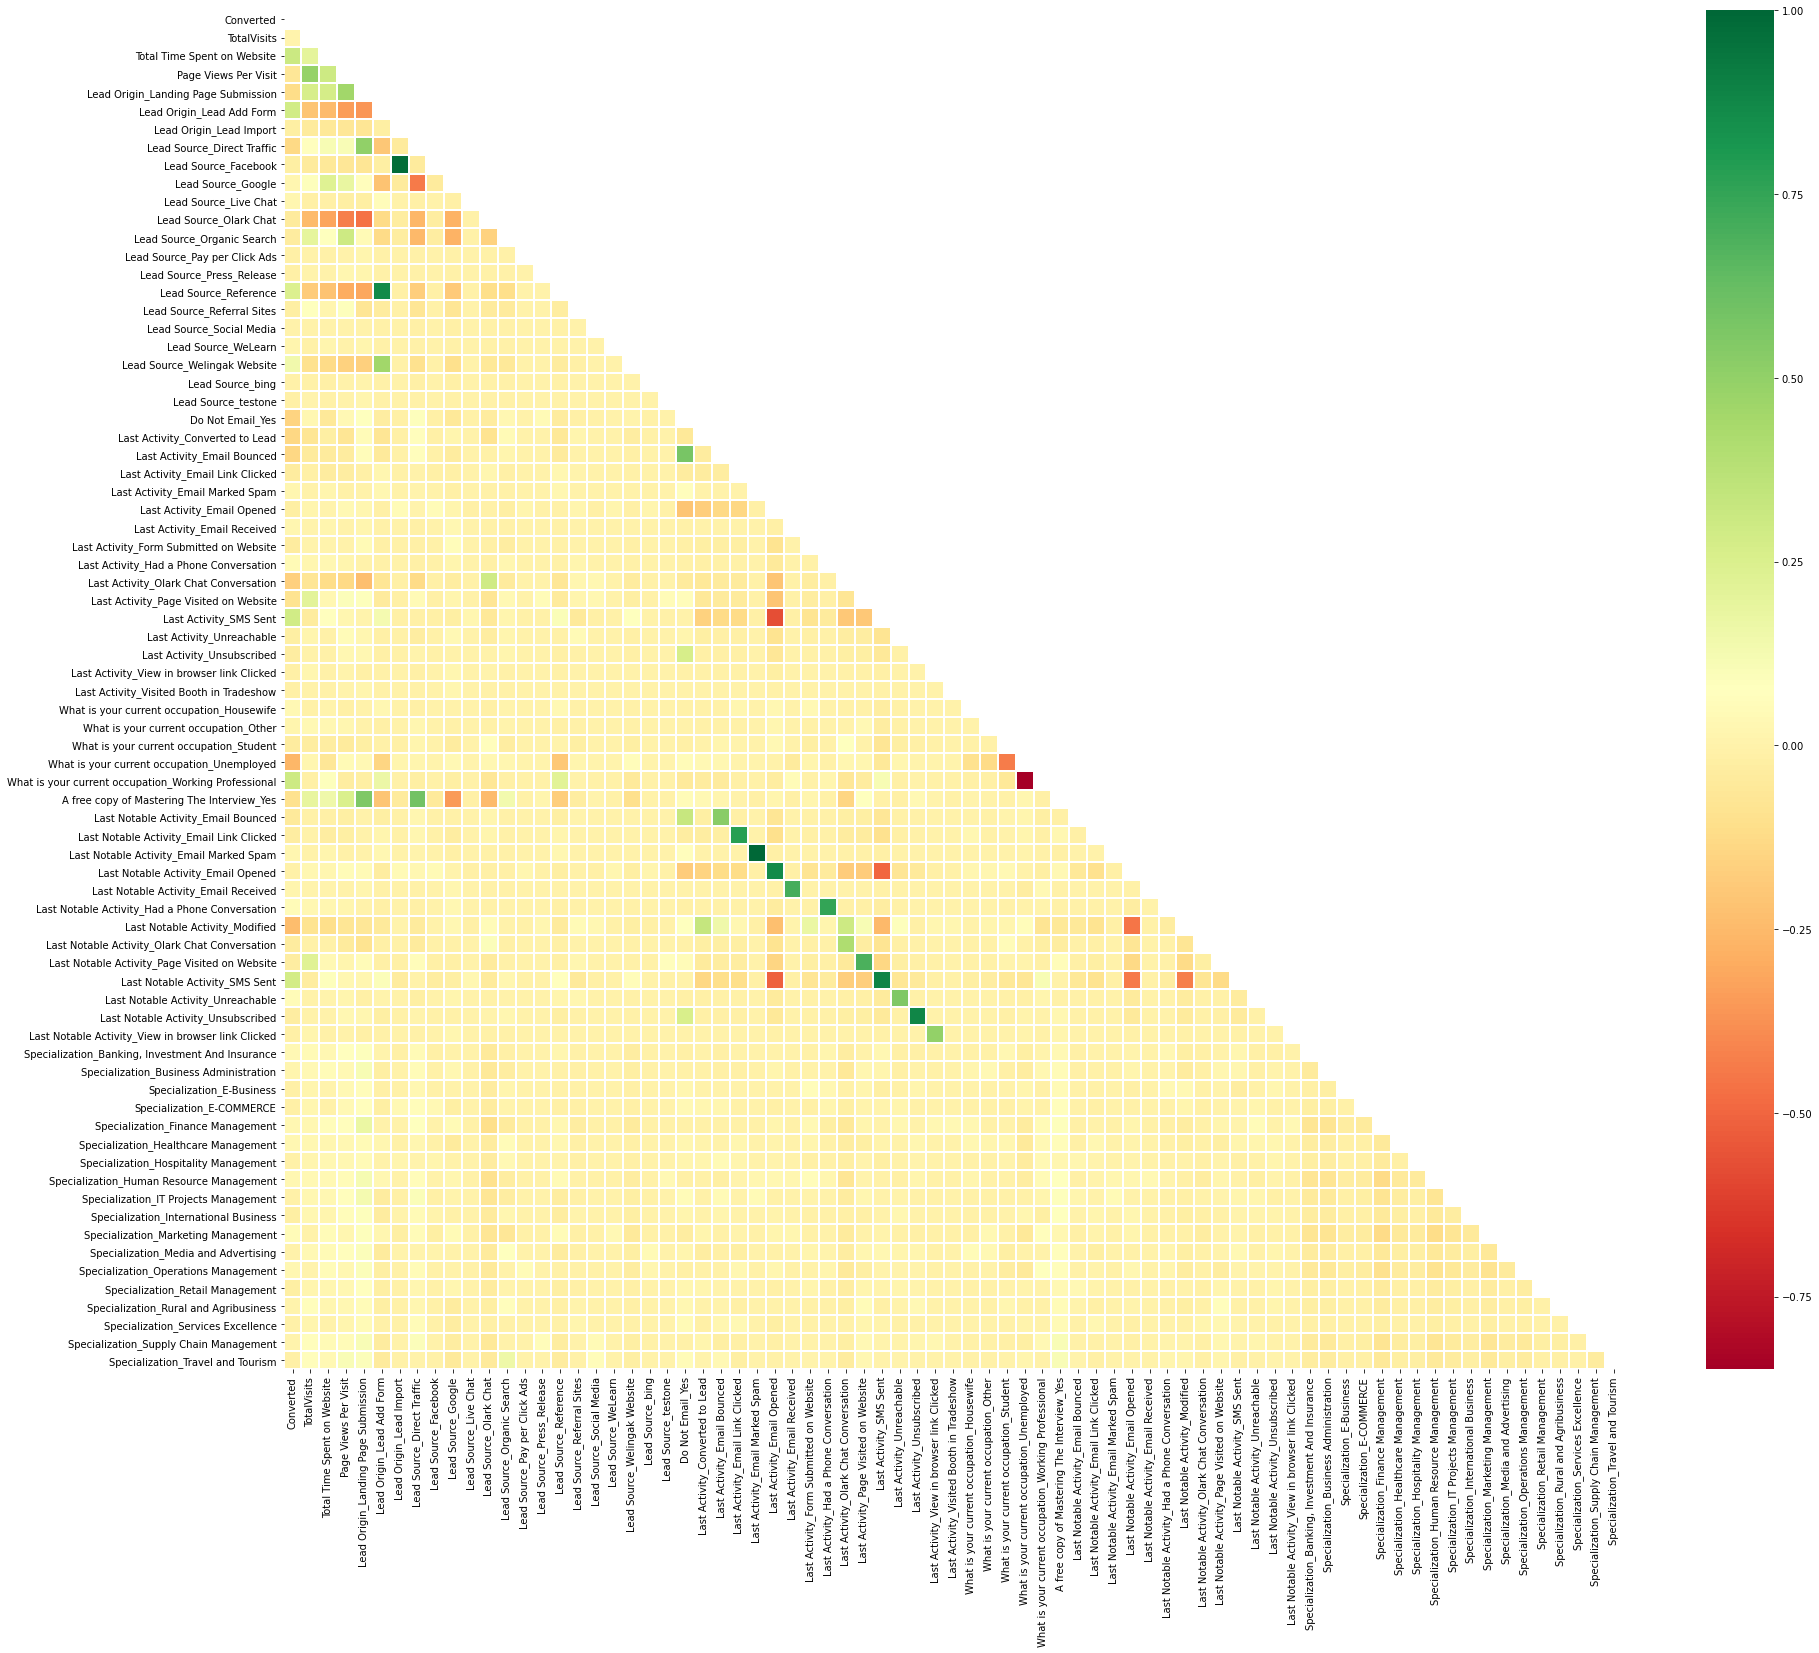

In [68]:
## Analysing using Heatmap 
plt.figure(figsize=(30,25))
mask = np.triu(np.ones_like(lead_df.corr()))
sns.heatmap(lead_df.corr() , annot= False , cmap= 'RdYlGn' ,mask = mask ,linewidth=1)
plt.show()

## Step 6 : Model Building

There are 74 columns available. Since it is huge in number while interpreting. First Going to use RFE approach to get top 15 featuers as output variables

In [69]:
# importing RFE and Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


In [70]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,15)
rfe = rfe.fit(X_train , y_train)

In [71]:
## looking at the features that have been selected by RFE
list(zip(X_train.columns , rfe.support_ , rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_testone', False, 38),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 25),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link C

In [72]:
## picking the rfe suppoprted columns 
rfe_columns = X_train.columns[rfe.support_] 
rfe_columns

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [73]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_testone', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       '

Now We are going to analyze the statistics part such that p-value and VIF. By using statsmodels library

In [74]:
import statsmodels.api as sm

In [75]:
# choosing the rfe supported columns
X_train_rfe = X_train[rfe_columns]
X_train_rfe.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
8003,0.015936,0.029489,0,0,0,0,0,0,1,0,0,1,0,0,0
218,0.015936,0.082306,0,0,0,0,0,0,0,0,0,1,0,0,0
4171,0.023904,0.034331,0,0,0,0,0,0,0,0,0,1,0,0,0
4037,0.000000,0.000000,0,1,0,0,0,0,0,0,0,1,0,0,0
3660,0.000000,0.000000,1,0,1,0,0,0,1,0,0,1,0,0,0


In [76]:
# fitting a Logistic Regression Model
X_train_sm = sm.add_constant(X_train_rfe)
X_train_sm.head()

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
8003,1.0,0.015936,0.029489,0,0,0,0,0,0,1,0,0,1,0,0,0
218,1.0,0.015936,0.082306,0,0,0,0,0,0,0,0,0,1,0,0,0
4171,1.0,0.023904,0.034331,0,0,0,0,0,0,0,0,0,1,0,0,0
4037,1.0,0.000000,0.000000,0,1,0,0,0,0,0,0,0,1,0,0,0
3660,1.0,0.000000,0.000000,1,0,1,0,0,0,1,0,0,1,0,0,0


In [77]:
# building the model 
logm2 = sm.GLM(y_train, X_train_sm , family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Wed, 08 Dec 2021   Deviance:                       4145.5
Time:                        13:13:29   Pearson chi2:                 4.84e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

We can infer few variables have p-value greater than 0.05. Those needs to be handled. checking  the VIF values

In [78]:
# importing variance_inflation_factop
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.19
4,Lead Source_Reference,65.18
5,Lead Source_Welingak Website,20.03
11,What is your current occupation_Unemployed,3.65
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
0,TotalVisits,1.62
8,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Profes...,1.56


*we can see that VIF values are in decent range except for 3 columns . Considering this , first going to drop the column 
 'Lead Source_Reference' since it has both high p-value and high VIF value*

### Dropping the column and Updating the Model

In [80]:
X_train_rfe.drop('Lead Source_Reference' , axis=1, inplace=True)

In [81]:
X_train_rfe.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
8003,0.015936,0.029489,0,0,0,0,0,1,0,0,1,0,0,0
218,0.015936,0.082306,0,0,0,0,0,0,0,0,1,0,0,0
4171,0.023904,0.034331,0,0,0,0,0,0,0,0,1,0,0,0
4037,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,0,0
3660,0.000000,0.000000,1,0,0,0,0,1,0,0,1,0,0,0


In [82]:
# fitting a Logistic Regression Model
X_train_sm = sm.add_constant(X_train_rfe)
X_train_sm.head()

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
8003,1.0,0.015936,0.029489,0,0,0,0,0,1,0,0,1,0,0,0
218,1.0,0.015936,0.082306,0,0,0,0,0,0,0,0,1,0,0,0
4171,1.0,0.023904,0.034331,0,0,0,0,0,0,0,0,1,0,0,0
4037,1.0,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,0,0
3660,1.0,0.000000,0.000000,1,0,0,0,0,1,0,0,1,0,0,0


In [83]:
# refitting the model with new set of features 
logm3 = sm.GLM(y_train, X_train_sm , family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Wed, 08 Dec 2021   Deviance:                       4146.5
Time:                        13:13:29   Pearson chi2:                 4.82e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5036      0.193     -7.779      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

We can infer few variables have p-value greater than 0.05. Those needs to be handled. checking the VIF values

In [84]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.65
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33


- Now we can see that VIF values for all the columns are dropped below 5. Now proceeding to drop the columns which are having higher p-values

### Dropping the column and Updating the Model

In [85]:
X_train_rfe.drop('Last Notable Activity_Had a Phone Conversation' , axis=1, inplace=True)
X_train_rfe.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
8003,0.015936,0.029489,0,0,0,0,0,1,0,0,1,0,0
218,0.015936,0.082306,0,0,0,0,0,0,0,0,1,0,0
4171,0.023904,0.034331,0,0,0,0,0,0,0,0,1,0,0
4037,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,0
3660,0.000000,0.000000,1,0,0,0,0,1,0,0,1,0,0


In [86]:
# fitting a Logistic Regression Model
X_train_sm = sm.add_constant(X_train_rfe)
X_train_sm.head()

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
8003,1.0,0.015936,0.029489,0,0,0,0,0,1,0,0,1,0,0
218,1.0,0.015936,0.082306,0,0,0,0,0,0,0,0,1,0,0
4171,1.0,0.023904,0.034331,0,0,0,0,0,0,0,0,1,0,0
4037,1.0,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,0
3660,1.0,0.000000,0.000000,1,0,0,0,0,1,0,0,1,0,0


In [87]:
# refitting the model with new set of features 
logm4 = sm.GLM(y_train, X_train_sm , family = sm.families.Binomial())
res4 = logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Wed, 08 Dec 2021   Deviance:                       4152.2
Time:                        13:13:29   Pearson chi2:                 4.82e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0069      0.600     -1.679      0.093      -2.182       0.168
TotalVisits                                             11.4551      2.686      4.265      0.000       6.191      16.720
Total Time Spent on Website                              4.4237      0.185     23.900      0.000       4.061       4.787
Lead Origin_Lead Add Form                                4.2082      0.259     16.276      0.000       3.701       4.715
Lead Source_Olark Chat                                   1.4581      0.122     11.958      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5037      0.193     -7.780      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   2.7502      0.802      3.430      0.001       1.179       4.322
Last Activity_SMS Sent                                   1.1826      0.082     14.364      0.000       1.021       1.344
What is your current occupation_Housewife               21.6525   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1520      0.630     -1.828      0.068      -2.387       0.083
What is your current occupation_Unemployed              -1.3385      0.594     -2.253      0.024      -2.503      -0.174
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.495
Last Notable Activity_Unreachable                        2.7862      0.807      3.453      0.001       1.205       4.368
========================================================================================================================
"""

In [88]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.65
1,Total Time Spent on Website,2.38
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33
5,Do Not Email_Yes,1.09
9,What is your current occupation_Student,1.09


'What is your current occupation_Housewife' has higher p-value 

### Dropping the variable and Updating the model

In [89]:
X_train_rfe.drop('What is your current occupation_Housewife' , axis=1, inplace=True)
X_train_rfe.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
8003,0.015936,0.029489,0,0,0,0,0,1,0,1,0,0
218,0.015936,0.082306,0,0,0,0,0,0,0,1,0,0
4171,0.023904,0.034331,0,0,0,0,0,0,0,1,0,0
4037,0.000000,0.000000,0,1,0,0,0,0,0,1,0,0
3660,0.000000,0.000000,1,0,0,0,0,1,0,1,0,0


In [90]:
# fitting a Logistic Regression Model
X_train_sm = sm.add_constant(X_train_rfe)
X_train_sm.head()

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
8003,1.0,0.015936,0.029489,0,0,0,0,0,1,0,1,0,0
218,1.0,0.015936,0.082306,0,0,0,0,0,0,0,1,0,0
4171,1.0,0.023904,0.034331,0,0,0,0,0,0,0,1,0,0
4037,1.0,0.000000,0.000000,0,1,0,0,0,0,0,1,0,0
3660,1.0,0.000000,0.000000,1,0,0,0,0,1,0,1,0,0


In [91]:
# refitting the model with new set of features 
logm5 = sm.GLM(y_train, X_train_sm , family = sm.families.Binomial())
res5 = logm5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Wed, 08 Dec 2021   Deviance:                       4156.7
Time:                        13:13:30   Pearson chi2:                 4.83e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Do Not Email_Yes                                        -1.5063      0.193     -7.785      0.000      -1.886      -1.127
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

'What is your current occupation_Working Professional' has higher p-value. Dropping it

### Dropping the variable and updating the model

In [92]:
X_train_rfe.drop('What is your current occupation_Working Professional' , axis=1, inplace=True)
X_train_rfe.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable
8003,0.015936,0.029489,0,0,0,0,0,1,0,1,0
218,0.015936,0.082306,0,0,0,0,0,0,0,1,0
4171,0.023904,0.034331,0,0,0,0,0,0,0,1,0
4037,0.000000,0.000000,0,1,0,0,0,0,0,1,0
3660,0.000000,0.000000,1,0,0,0,0,1,0,1,0


In [93]:
# fitting a Logistic Regression Model
X_train_sm = sm.add_constant(X_train_rfe)
X_train_sm.head()

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable
8003,1.0,0.015936,0.029489,0,0,0,0,0,1,0,1,0
218,1.0,0.015936,0.082306,0,0,0,0,0,0,0,1,0
4171,1.0,0.023904,0.034331,0,0,0,0,0,0,0,1,0
4037,1.0,0.000000,0.000000,0,1,0,0,0,0,0,1,0
3660,1.0,0.000000,0.000000,1,0,0,0,0,1,0,1,0


In [94]:
# refitting the model with new set of features 
logm6 = sm.GLM(y_train, X_train_sm , family = sm.families.Binomial())
res6 = logm6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Wed, 08 Dec 2021   Deviance:                       4158.1
Time:                        13:13:30   Pearson chi2:                 4.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Do Not Email_Yes                              -1.5037      0.193     -7.774      0.000      -1.883      -1.125
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

- Now all the p-values are within the range. Checking the VIF-values once again

In [95]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.82
1,Total Time Spent on Website,2.00
0,TotalVisits,1.54
7,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.45
3,Lead Source_Olark Chat,1.33
4,Lead Source_Welingak Website,1.30
5,Do Not Email_Yes,1.08
8,What is your current occupation_Student,1.06
6,Last Activity_Had a Phone Conversation,1.01


Now for all the features p-values and vif values are within range. Proceeding with Model evaluation

## Step7: Model evaluation

In [96]:
# predicting the probabilities on the train set 
y_train_pred = res6.predict(sm.add_constant(X_train_rfe))
y_train_pred[:10]

8003    0.300117
218     0.142002
4171    0.127629
4037    0.291558
3660    0.954795
207     0.194426
2044    0.178073
6411    0.949460
6498    0.075995
2085    0.982316
dtype: float64

In [97]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30011695, 0.14200165, 0.12762885, 0.29155814, 0.95479546,
       0.19442563, 0.17807328, 0.94946006, 0.07599465, 0.98231619])

### Creating a dataframe with actual converted flag and predicted probabilities

In [98]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})

In [99]:
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.300117
1,0,0.142002
2,1,0.127629
3,1,0.291558
4,1,0.954795


#### As per now, assigning a threshhold values as 0.5 i.e if Conversion_Prob > 0.5 make 1 else 0 

In [100]:
y_train_pred_final['Predicted'] = y_train_pred_final['Conversion_Prob'].map(lambda x: 1 if x>0.5 else 0)

In [101]:
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.300117,0
1,0,0.142002,0
2,1,0.127629,0
3,1,0.291558,0
4,1,0.954795,1


Now Going to Evaluate the Model

In [102]:
# import metrics 
from sklearn import metrics

In [103]:
# let's check the confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted , y_train_pred_final.Predicted)
confusion

array([[1929,  383],
       [ 560, 1589]], dtype=int64)

By using the confusion matrix, we can check accuracy, sensitivity , specificity , precision , recall metrics 

In [104]:
# checking the overall accuracy of the model with train set 
print('The overall accuracy with Train data is',metrics.accuracy_score(y_train_pred_final.Converted , y_train_pred_final.Predicted))

The overall accuracy with Train data is 0.7886124187401928


In [105]:
# going to evaluate the other metrics
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Calculating the sensitivity

In [106]:
TP/float(TP+FN)

0.739413680781759

#### Calculating the specificity

In [107]:
TN/float(TN+FP)

0.8343425605536332

In [108]:
# positive predictive value 
print (TP / float(TP+FP))

0.8057809330628803


In [109]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7750100441944556


We chose 0.5 as an arbitrary value just to get an overview. In order to get an optimal threshold values,going to plot ROC curve

## Step8: Finding the Optimal cut-off

In [110]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [111]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

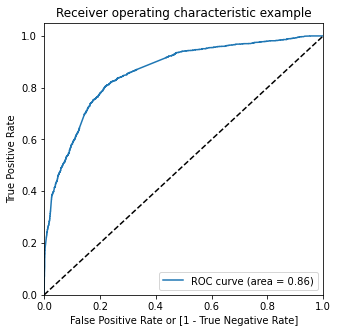

In [112]:
## calling the roc function
draw_roc(y_train_pred_final.Converted , y_train_pred_final.Conversion_Prob)

*The area under ROC curve is 0.86 which seems to be a good model.*

In [113]:
# lets create columns with different cut offs 
numbers = [float(x/10) for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1


In [114]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix


for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1 
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.481731     1.000000     0.000000
0.1   0.1  0.527012     0.994416     0.092561
0.2   0.2  0.698274     0.944160     0.469723
0.3   0.3  0.767541     0.865984     0.676038
0.4   0.4  0.791975     0.810610     0.774654
0.5   0.5  0.788612     0.739414     0.834343
0.6   0.6  0.757229     0.624011     0.881055
0.7   0.7  0.735037     0.543509     0.913062
0.8   0.8  0.711500     0.453234     0.951557
0.9   0.9  0.644026     0.279665     0.982699


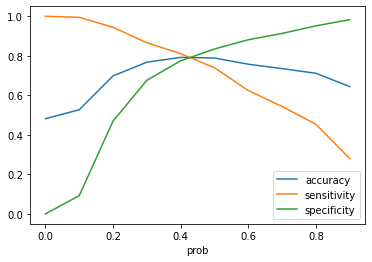

In [115]:
## Going to plot accuracy , sesntitivity , specificity to get optimal cut-off value
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

We can notice that all the three lines merges around 0.42. Choosing 0.42 as Optimal threshold

In [116]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1


#### Accuracy

In [117]:
print(metrics.accuracy_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted))

0.7908540685944856


In [118]:
# let's check the confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted , y_train_pred_final.final_predicted)
confusion2

array([[1823,  489],
       [ 444, 1705]], dtype=int64)

In [119]:
# going to evaluate the other metrics
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Sensitivity

In [120]:
TP/float(TP+FN)

0.793392275476966

#### Specificity

In [121]:
TN/float(TN+FP)

0.7884948096885813

Overall Accuracy,Sensitivity,Specificity seems to be good and almost similar around 80%

## Step 9: Making Predictions on the Test Set

In [122]:
# scaling the test set by using transfrom
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [123]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,0.000000,0.000000,0.0000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6122,0.027888,0.029049,0.4375,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9202,0.015936,0.416813,0.2500,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6570,0.011952,0.378961,0.1875,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2668,0.031873,0.395246,0.2500,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [124]:
X_train_rfe.columns

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [125]:
X_test_rfe = X_test[X_train_rfe.columns]
X_test_rfe.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable
4771,0.000000,0.000000,1,0,0,0,0,1,0,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,1,0
9202,0.015936,0.416813,0,0,0,0,0,1,0,1,0
6570,0.011952,0.378961,0,0,0,1,0,1,0,1,0
2668,0.031873,0.395246,0,0,0,0,0,1,0,1,0


In [126]:
# adding a constant to X_test_rfe
X_test_sm = sm.add_constant(X_test_rfe)
X_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,1,0,0,0,0,1,0,0,0
6122,1.0,0.027888,0.029049,0,0,0,0,0,0,0,1,0
9202,1.0,0.015936,0.416813,0,0,0,0,0,1,0,1,0
6570,1.0,0.011952,0.378961,0,0,0,1,0,1,0,1,0
2668,1.0,0.031873,0.395246,0,0,0,0,0,1,0,1,0


In [127]:
# predicting the probabilities on the test set 
y_test_pred = res6.predict(X_test_sm)
y_test_pred[:10]

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
4233    0.792250
3368    0.704038
9091    0.464521
5972    0.282978
3631    0.786460
dtype: float64

In [128]:
# converting this to a data frame
y_test_preddf = pd.DataFrame(y_test_pred)
y_test_preddf.head()

,0
4771,0.996296
6122,0.129992
9202,0.703937
6570,0.299564
2668,0.720796


In [129]:
# converting y_test to a dataframe 
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4771,1
6122,0
9202,0
6570,1
2668,1


In [130]:
# removing the index and appending it from side by side 
y_test_preddf.reset_index(drop=True , inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [131]:
y_test_pred_final = pd.concat([y_test_df , y_test_preddf] , axis=1)
y_test_pred_final.head()

,Converted,0
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [132]:
# Renaming the column 
y_test_pred_final = y_test_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_test_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [133]:
# By using 0.42 as cut-off , assigning the predicted value
y_test_pred_final['final_predicted'] = y_test_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [134]:
y_test_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996296,1
1,0,0.129992,0
2,0,0.703937,1
3,1,0.299564,0
4,1,0.720796,1


#### Accuraccy, Sensitivity , Specificity

In [135]:
print(metrics.accuracy_score(y_test_pred_final.Converted , y_test_pred_final.final_predicted))

0.7845188284518828


In [136]:
confusion3 = metrics.confusion_matrix(y_test_pred_final.Converted , y_test_pred_final.final_predicted)
confusion3

array([[786, 210],
       [202, 714]], dtype=int64)

In [137]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [138]:
# Calculate sensitivity
TP / float(TP+FN)

0.7794759825327511

In [139]:
# Calculate specificity
TN / float(TN+FP)

0.7891566265060241

- We can infer that Accuracy , Sensitivity , Specificity metrics for both train and test sets are almost same. Hence the model performs good with accuracy around 80%
- We can infer that no Overfitting and Underfitting parameters is done

## Precision - Recall view

In [140]:
# let's check the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted , y_train_pred_final.Predicted)
confusion

array([[1929,  383],
       [ 560, 1589]], dtype=int64)

#### Precision

Precision is defined as the probability that a predicted 'Yes' is actually 'yes'

i.e TP / (TP + FP)

In [141]:
# going to evaluate the other metrics
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [142]:
print(TP / float(TP+FP))

0.8057809330628803


#### RECALL 

Recall is same as Sensitivity

In [143]:
print(TP / float(TP + FN))

0.739413680781759


### Precision-Recall Trade off

In [144]:
from sklearn.metrics import precision_recall_curve

In [145]:
y_train_pred_final.Converted , y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [146]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

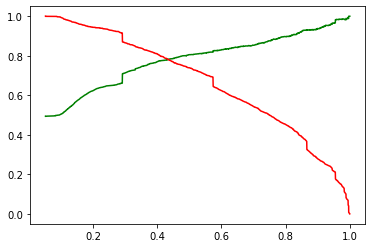

In [147]:
plt.plot(thresholds,p[:-1],"g-")
plt.plot(thresholds,r[:-1],"r-")
plt.show()

From the above plot, we can infer that at Probability 0.44 both Precision and recall curve merges. Choosing this as Optimal Threshold

In [148]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1


#### Accuracy

In [149]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.7895090786819099


Accuracy obtaining around 79% which seems to be good

In [150]:
# let's check the confusion matrix again
confusion4 = metrics.confusion_matrix(y_train_pred_final.Converted , y_train_pred_final.final_predicted)
confusion4

array([[1852,  460],
       [ 479, 1670]], dtype=int64)

In [151]:
# going to evaluate the other metrics
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

#### Precision

In [152]:
print(TP/float(TP+FP))

0.784037558685446


#### Recall

In [153]:
print(TP/float(TP+FN))

0.7771056305258259


- By choosing the arbitrary cut-off as 0.44 , the Model evaluation metrics seems overall good around 79%

### Making Predictions on the test set with arbitrary value as 0.44

In [154]:
## checking the already used data frame
y_test_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996296,1
1,0,0.129992,0
2,0,0.703937,1
3,1,0.299564,0
4,1,0.720796,1


In [155]:
# making predictions on the test set with cut-off as 0.44
y_test_pred_final['final_predicted'] = y_test_pred_final.Conversion_Prob.map(lambda x: 1 if x>0.44 else 0)

In [156]:
y_test_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996296,1
1,0,0.129992,0
2,0,0.703937,1
3,1,0.299564,0
4,1,0.720796,1


#### Accuracy

In [157]:
print(metrics.accuracy_score(y_test_pred_final.Converted , y_test_pred_final.final_predicted))

0.7866108786610879


In [158]:
# let's check the confusion matrix again
confusion5 = metrics.confusion_matrix(y_test_pred_final.Converted , y_test_pred_final.final_predicted)
confusion5

array([[801, 195],
       [213, 703]], dtype=int64)

In [159]:
TP = confusion5[1,1] # true positive 
TN = confusion5[0,0] # true negatives
FP = confusion5[0,1] # false positives
FN = confusion5[1,0] # false negatives

#### Precision

In [160]:
print(TP/float(TP+FP))

0.7828507795100222


#### Recall

In [161]:
print(TP/float(TP+FN))

0.767467248908297


- We can infer that Accuracy , Precision , Recall metrics for both train and test sets are almost same. Hence the model performs good with accuracy around 78-80%
- We can infer that no Overfitting and Underfitting parameters is done

In [162]:
print(res6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Wed, 08 Dec 2021   Deviance:                       4158.1
Time:                        13:13:32   Pearson chi2:                 4.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

## Conclusion

Features which contribute more towards the probability of a lead getting Converted are
- TotalVisits
- Total Time Spent on Website
- When the Lead Origin was 
    Lead Add Form
- When the Lead Source was 
 1. Olark chat  
 2. Welingak Website
- When the Last Activity was 
 1. Phone Conversation
 2. SMS sent
     
After Obtaining the list of leads, We have to inform them about new courses , offers ,services , job information and extension of higher studies to them 

Conducting Surveys to the leads will help us to determine their intention in joining the Online courses.This will help us in refining the approach better
        
